In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/Housing.csv"
hf = pd.read_csv(url)

# **Pre-processing and Training**


> **Separating desired Features and Outputs**


In [2]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = hf.pop('price')
x = hf[features].values

t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_u = torch.tensor(x, dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)


> **Splitting Training and Validation Set**


In [3]:
samples = t_un.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]



> **Linear Regression Training**




In [4]:
def lin_model(t_u, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss}, \tValidation Loss: {valid_loss}')
  return params, train_losses, valid_losses

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [5]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 1000, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 1500, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 2000, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 2500, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 3000, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 3500, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 4000, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 4500, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0
Epochs: 5000, 	Training Loss: 1418175971328.0, 	Validation Loss: 1996837617664.0


> *Trained with LR of* ***1e-2***

In [6]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 1418177019904.0, 	Validation Loss: 1996661850112.0
Epochs: 1000, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996835127296.0
Epochs: 1500, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 2000, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 2500, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 3000, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 3500, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 4000, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 4500, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0
Epochs: 5000, 	Training Loss: 1418176102400.0, 	Validation Loss: 1996834996224.0


> *Trained with LR of* ***1e-3***

In [7]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4686528643072.0, 	Validation Loss: 5360551198720.0
Epochs: 1000, 	Training Loss: 1878513156096.0, 	Validation Loss: 2373100765184.0
Epochs: 1500, 	Training Loss: 1484966592512.0, 	Validation Loss: 2008428183552.0
Epochs: 2000, 	Training Loss: 1428251213824.0, 	Validation Loss: 1980548907008.0
Epochs: 2500, 	Training Loss: 1419797725184.0, 	Validation Loss: 1986908782592.0
Epochs: 3000, 	Training Loss: 1418465771520.0, 	Validation Loss: 1992190984192.0
Epochs: 3500, 	Training Loss: 1418235740160.0, 	Validation Loss: 1994786078720.0
Epochs: 4000, 	Training Loss: 1418190258176.0, 	Validation Loss: 1995936497664.0
Epochs: 4500, 	Training Loss: 1418179772416.0, 	Validation Loss: 1996434702336.0
Epochs: 5000, 	Training Loss: 1418177150976.0, 	Validation Loss: 1996650971136.0


> *Trained with LR of* ***1e-4***

In [8]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 21149675159552.0, 	Validation Loss: 23642001899520.0
Epochs: 1000, 	Training Loss: 17526807330816.0, 	Validation Loss: 19577801015296.0
Epochs: 1500, 	Training Loss: 14581255634944.0, 	Validation Loss: 16286557929472.0
Epochs: 2000, 	Training Loss: 12183118282752.0, 	Validation Loss: 13617087905792.0
Epochs: 2500, 	Training Loss: 10228294746112.0, 	Validation Loss: 11449010225152.0
Epochs: 3000, 	Training Loss: 8633151651840.0, 	Validation Loss: 9686166274048.0
Epochs: 3500, 	Training Loss: 7330269233152.0, 	Validation Loss: 8251454783488.0
Epochs: 4000, 	Training Loss: 6265222725632.0, 	Validation Loss: 7082922737664.0
Epochs: 4500, 	Training Loss: 5393944150016.0, 	Validation Loss: 6130622267392.0
Epochs: 5000, 	Training Loss: 4680711667712.0, 	Validation Loss: 5354217275392.0


# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [9]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 23081135374336.0, 	Validation Loss: 25686811082752.0
Epochs: 1000, 	Training Loss: 20806830653440.0, 	Validation Loss: 23024346595328.0
Epochs: 1500, 	Training Loss: 18715682799616.0, 	Validation Loss: 20594399641600.0
Epochs: 2000, 	Training Loss: 16793110315008.0, 	Validation Loss: 18378800496640.0
Epochs: 2500, 	Training Loss: 15027300990976.0, 	Validation Loss: 16362800939008.0
Epochs: 3000, 	Training Loss: 13408734806016.0, 	Validation Loss: 14534484951040.0
Epochs: 3500, 	Training Loss: 11929780224000.0, 	Validation Loss: 12884204584960.0
Epochs: 4000, 	Training Loss: 10584235966464.0, 	Validation Loss: 11404027363328.0
Epochs: 4500, 	Training Loss: 9366961913856.0, 	Validation Loss: 10087222476800.0
Epochs: 5000, 	Training Loss: 8273501618176.0, 	Validation Loss: 8927806750720.0


> *Trained with LR of* ***1e-2***

In [10]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 25294685601792.0, 	Validation Loss: 28294690897920.0
Epochs: 1000, 	Training Loss: 25039908896768.0, 	Validation Loss: 27993781043200.0
Epochs: 1500, 	Training Loss: 24787093028864.0, 	Validation Loss: 27695366799360.0
Epochs: 2000, 	Training Loss: 24536133140480.0, 	Validation Loss: 27399332823040.0
Epochs: 2500, 	Training Loss: 24286934859776.0, 	Validation Loss: 27105557479424.0
Epochs: 3000, 	Training Loss: 24039414300672.0, 	Validation Loss: 26813956882432.0
Epochs: 3500, 	Training Loss: 23793527422976.0, 	Validation Loss: 26524459728896.0
Epochs: 4000, 	Training Loss: 23549217603584.0, 	Validation Loss: 26237007298560.0
Epochs: 4500, 	Training Loss: 23306440802304.0, 	Validation Loss: 25951549259776.0
Epochs: 5000, 	Training Loss: 23065165561856.0, 	Validation Loss: 25668052058112.0


> *Trained with LR of* ***1e-3***

In [11]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 25525298921472.0, 	Validation Loss: 28567224188928.0
Epochs: 1000, 	Training Loss: 25499537506304.0, 	Validation Loss: 28536771444736.0
Epochs: 1500, 	Training Loss: 25473799159808.0, 	Validation Loss: 28506348060672.0
Epochs: 2000, 	Training Loss: 25448077590528.0, 	Validation Loss: 28475947745280.0
Epochs: 2500, 	Training Loss: 25422372798464.0, 	Validation Loss: 28445570498560.0
Epochs: 3000, 	Training Loss: 25396691075072.0, 	Validation Loss: 28415220514816.0
Epochs: 3500, 	Training Loss: 25371019837440.0, 	Validation Loss: 28384885211136.0
Epochs: 4000, 	Training Loss: 25345365377024.0, 	Validation Loss: 28354570878976.0
Epochs: 4500, 	Training Loss: 25319723499520.0, 	Validation Loss: 28324275421184.0
Epochs: 5000, 	Training Loss: 25294098399232.0, 	Validation Loss: 28293998837760.0


> *Trained with LR of* ***1e-4***

In [12]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 25548449382400.0, 	Validation Loss: 28594596216832.0
Epochs: 1000, 	Training Loss: 25545874079744.0, 	Validation Loss: 28591542763520.0
Epochs: 1500, 	Training Loss: 25543292485632.0, 	Validation Loss: 28588493504512.0
Epochs: 2000, 	Training Loss: 25540717182976.0, 	Validation Loss: 28585448439808.0
Epochs: 2500, 	Training Loss: 25538135588864.0, 	Validation Loss: 28582397083648.0
Epochs: 3000, 	Training Loss: 25535558189056.0, 	Validation Loss: 28579352018944.0
Epochs: 3500, 	Training Loss: 25532978692096.0, 	Validation Loss: 28576304857088.0
Epochs: 4000, 	Training Loss: 25530401292288.0, 	Validation Loss: 28573253500928.0
Epochs: 4500, 	Training Loss: 25527821795328.0, 	Validation Loss: 28570208436224.0
Epochs: 5000, 	Training Loss: 25525242298368.0, 	Validation Loss: 28567159177216.0


# **Linear Regression Loss Plots**

>**SGD Optimized Linear Model**

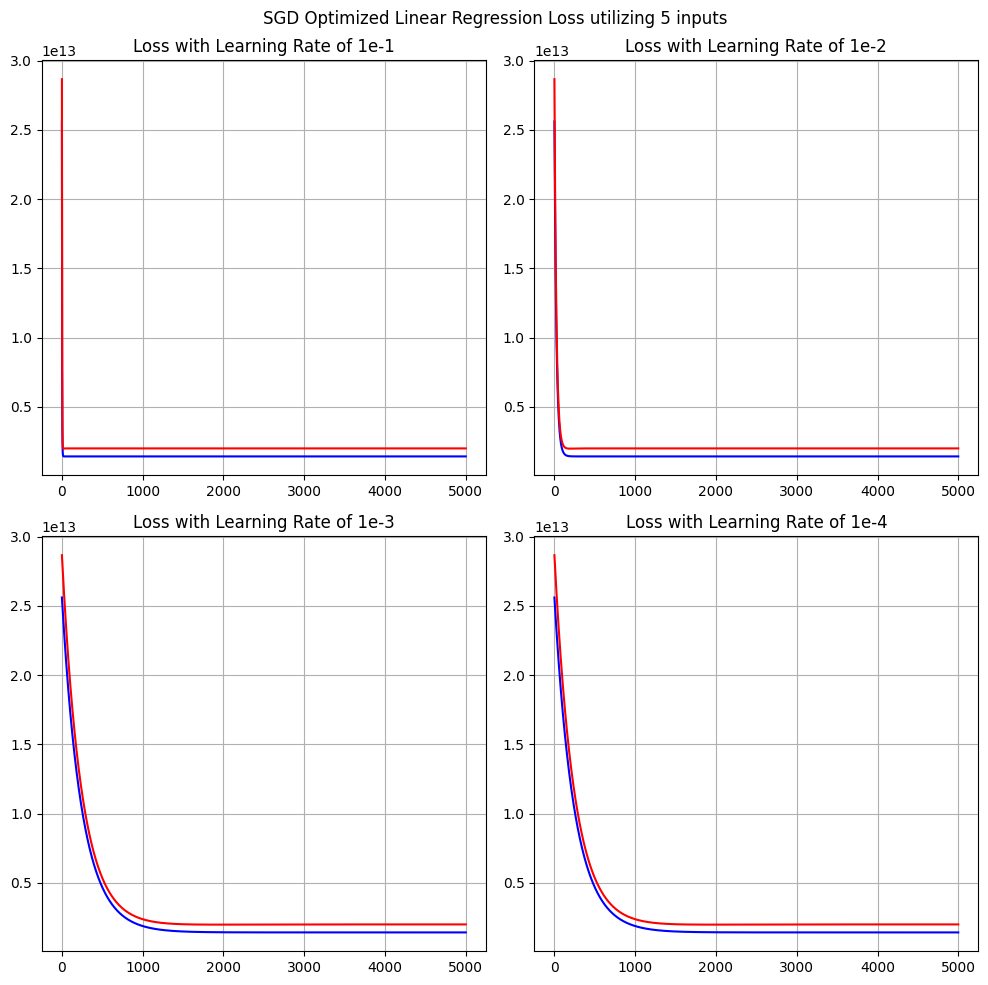

In [14]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.grid(True)
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()



> **Adam Optimized Linear Model**



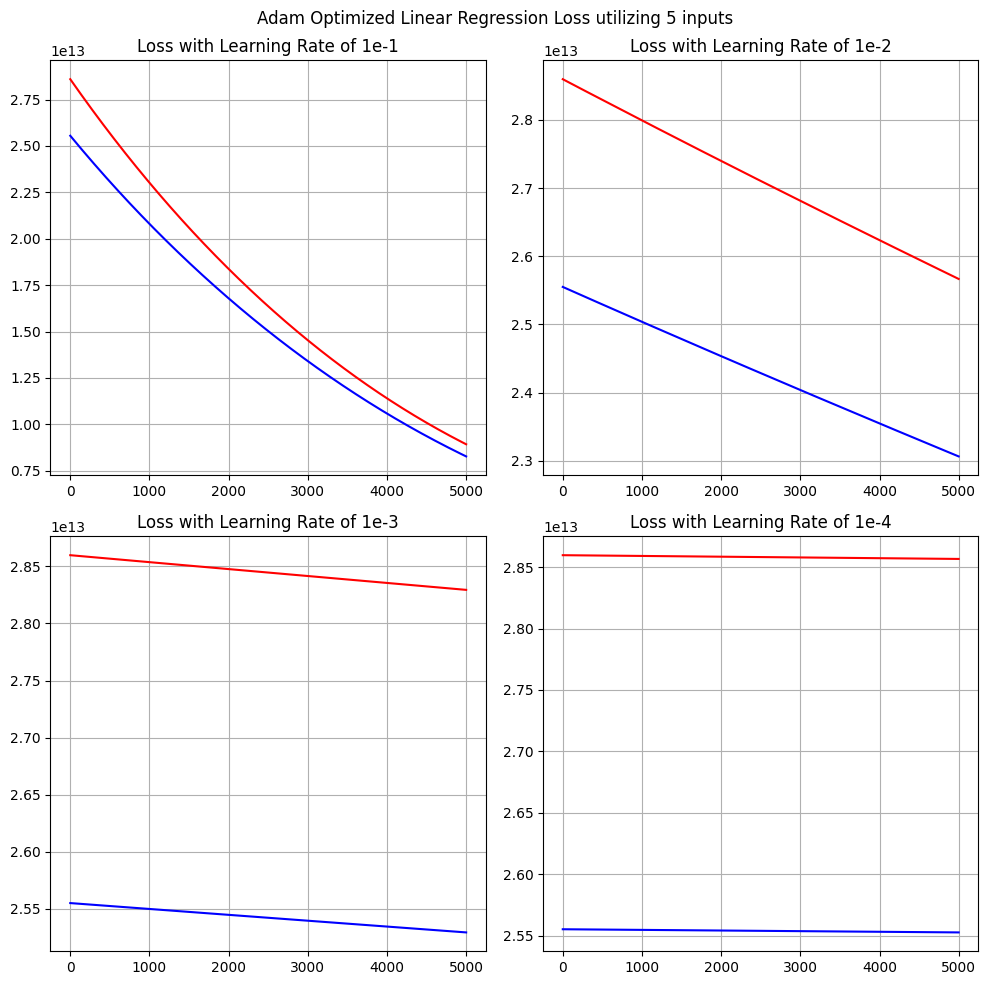

In [17]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimized Linear Regression Loss utilizing 5 inputs')

plt.subplot(2,2,1)
plt.grid(True)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.grid(True)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.grid(True)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.grid(True)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()